# Load the data

In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
dirpath = 'HousePredictionKaggle/'
import os
for dirname, _, filenames in os.walk(dirpath):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

HousePredictionKaggle/output.csv
HousePredictionKaggle/data.csv
HousePredictionKaggle/data.dat


In [71]:
## import libraries

import pandas as pd
import numpy as np

import pickle5 as pickle
import datetime as dt
from sklearn.preprocessing import LabelEncoder


In [72]:
df = pd.read_csv(dirpath+"/data.csv")  # Reading dataset
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


# Exploratory Data Analysis

In [73]:
def preprocessing(df):
    #extract data
    df["date"]= pd.to_datetime(df["date"])
    df["day"] = df["date"].dt.day
    df["month"] = df["date"].dt.month
    df["year"] = df["date"].dt.year
    df = df.drop(columns=["date"])

    #set types
    df["price"]= df["price"].astype("int64")
    df["bedrooms"]= df["bedrooms"].astype("int64")
    df["bathrooms"]= df["bathrooms"].astype("int64")
    df["floors"]= df["floors"].astype("int64")

    #define binary features
    df["basement"] = ["No" if i == 0 else "Yes" for i in df["sqft_basement"]]
    df["situation"] = ["Former" if i <= 1990 else "New" for i in df["yr_built"]]
    df["renewal_status"] = ["Not_renewed" if i == 0 else "Renewed" for i in df["yr_renovated"]]

    #convert categorical to numerical
    lb = LabelEncoder()
    cat_variable = df.dtypes==object
    cat_variable = df.columns[cat_variable].tolist()
    df[cat_variable] = df[cat_variable].apply(lambda col: lb.fit_transform(col.astype(str)))

    return df   

df = preprocessing(df)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,street,city,statezip,country,day,month,year,basement,situation,renewal_status
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.0,4600.000000,4600.000000,4600.0,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,1.788913,2139.346957,1.485252e+04,1.459130,0.007174,0.240652,3.451739,1827.265435,...,2265.385870,25.674348,38.743696,0.0,14.791304,5.757609,2014.0,0.403261,0.311957,0.405435
std,5.638347e+05,0.908848,0.752185,963.206916,3.588444e+04,0.552194,0.084404,0.778405,0.677230,862.168977,...,1307.591795,11.982721,20.919517,0.0,8.677569,0.683851,0.0,0.490606,0.463343,0.491029
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,5.000000,2014.0,0.000000,0.000000,0.000000
25%,3.228750e+05,3.000000,1.000000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,...,1132.750000,17.000000,21.000000,0.0,7.000000,5.000000,2014.0,0.000000,0.000000,0.000000
50%,4.609430e+05,3.000000,2.000000,1980.000000,7.683000e+03,1.000000,0.000000,0.000000,3.000000,1590.000000,...,2263.500000,32.000000,41.000000,0.0,14.000000,6.000000,2014.0,0.000000,0.000000,0.000000
75%,6.549625e+05,4.000000,2.000000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,...,3400.250000,35.000000,56.000000,0.0,23.000000,6.000000,2014.0,1.000000,1.000000,1.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.000000,1.000000,4.000000,5.000000,9410.000000,...,4524.000000,43.000000,76.000000,0.0,31.000000,7.000000,2014.0,1.000000,1.000000,1.000000


In [74]:
def eliminate_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df =df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    df.dropna(inplace=True)
    return df

df = eliminate_outliers(df)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,street,city,statezip,country,day,month,year,basement,situation,renewal_status
count,3.457000e+03,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.0,3457.0,3457.000000,3457.000000,...,3457.000000,3457.000000,3457.000000,3457.0,3457.000000,3457.000000,3457.0,3457.000000,3457.000000,3457.000000
mean,4.548180e+05,3.292161,1.660110,1889.322823,7207.278565,1.446630,0.0,0.0,3.446919,1645.998264,...,2252.479896,25.929129,39.221579,0.0,14.723460,5.759329,2014.0,0.365346,0.322534,0.403529
std,1.994033e+05,0.782276,0.605633,671.350427,3598.448641,0.560155,0.0,0.0,0.662860,667.785149,...,1334.127576,11.649686,20.817843,0.0,8.659947,0.682910,0.0,0.481597,0.467514,0.490676
min,0.000000e+00,2.000000,0.000000,580.000000,681.000000,1.000000,0.0,0.0,2.000000,580.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,5.000000,2014.0,0.000000,0.000000,0.000000
25%,3.040000e+05,3.000000,1.000000,1380.000000,4738.000000,1.000000,0.0,0.0,3.000000,1140.000000,...,1071.000000,18.000000,22.000000,0.0,7.000000,5.000000,2014.0,0.000000,0.000000,0.000000
50%,4.250000e+05,3.000000,2.000000,1820.000000,7200.000000,1.000000,0.0,0.0,3.000000,1460.000000,...,2252.000000,32.000000,42.000000,0.0,14.000000,6.000000,2014.0,0.000000,0.000000,0.000000
75%,5.719860e+05,4.000000,2.000000,2320.000000,9260.000000,2.000000,0.0,0.0,4.000000,2040.000000,...,3434.000000,35.000000,57.000000,0.0,23.000000,6.000000,2014.0,1.000000,1.000000,1.000000
max,1.150000e+06,5.000000,3.000000,4140.000000,20000.000000,3.000000,0.0,0.0,5.000000,3960.000000,...,4524.000000,43.000000,76.000000,0.0,31.000000,7.000000,2014.0,1.000000,1.000000,1.000000


In [75]:
df.info() # looking at information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3457 entries, 0 to 4599
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   price           3457 non-null   int64
 1   bedrooms        3457 non-null   int64
 2   bathrooms       3457 non-null   int64
 3   sqft_living     3457 non-null   int64
 4   sqft_lot        3457 non-null   int64
 5   floors          3457 non-null   int64
 6   waterfront      3457 non-null   int64
 7   view            3457 non-null   int64
 8   condition       3457 non-null   int64
 9   sqft_above      3457 non-null   int64
 10  sqft_basement   3457 non-null   int64
 11  yr_built        3457 non-null   int64
 12  yr_renovated    3457 non-null   int64
 13  street          3457 non-null   int64
 14  city            3457 non-null   int64
 15  statezip        3457 non-null   int64
 16  country         3457 non-null   int64
 17  day             3457 non-null   int64
 18  month           3457 non-nul

In [76]:
df.describe()  # looking at statistical info

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,street,city,statezip,country,day,month,year,basement,situation,renewal_status
count,3.457000e+03,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.0,3457.0,3457.000000,3457.000000,...,3457.000000,3457.000000,3457.000000,3457.0,3457.000000,3457.000000,3457.0,3457.000000,3457.000000,3457.000000
mean,4.548180e+05,3.292161,1.660110,1889.322823,7207.278565,1.446630,0.0,0.0,3.446919,1645.998264,...,2252.479896,25.929129,39.221579,0.0,14.723460,5.759329,2014.0,0.365346,0.322534,0.403529
std,1.994033e+05,0.782276,0.605633,671.350427,3598.448641,0.560155,0.0,0.0,0.662860,667.785149,...,1334.127576,11.649686,20.817843,0.0,8.659947,0.682910,0.0,0.481597,0.467514,0.490676
min,0.000000e+00,2.000000,0.000000,580.000000,681.000000,1.000000,0.0,0.0,2.000000,580.000000,...,0.000000,0.000000,0.000000,0.0,1.000000,5.000000,2014.0,0.000000,0.000000,0.000000
25%,3.040000e+05,3.000000,1.000000,1380.000000,4738.000000,1.000000,0.0,0.0,3.000000,1140.000000,...,1071.000000,18.000000,22.000000,0.0,7.000000,5.000000,2014.0,0.000000,0.000000,0.000000
50%,4.250000e+05,3.000000,2.000000,1820.000000,7200.000000,1.000000,0.0,0.0,3.000000,1460.000000,...,2252.000000,32.000000,42.000000,0.0,14.000000,6.000000,2014.0,0.000000,0.000000,0.000000
75%,5.719860e+05,4.000000,2.000000,2320.000000,9260.000000,2.000000,0.0,0.0,4.000000,2040.000000,...,3434.000000,35.000000,57.000000,0.0,23.000000,6.000000,2014.0,1.000000,1.000000,1.000000
max,1.150000e+06,5.000000,3.000000,4140.000000,20000.000000,3.000000,0.0,0.0,5.000000,3960.000000,...,4524.000000,43.000000,76.000000,0.0,31.000000,7.000000,2014.0,1.000000,1.000000,1.000000


# Modelling

Let's start the model!

In [77]:
from sklearn.metrics import mean_squared_error

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country',
       'day', 'month', 'year', 'basement', 'situation', 'renewal_status'],
      dtype='object')

In [84]:
#X = df.drop(columns=["price","view","waterfront","country", "year", "situation","basement","renewal_status"])
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'floors', 'waterfront', 'view', 'yr_built', 'yr_renovated', 'city', 'country', 'renewal_status']]
y = df["price"]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [85]:
X_test.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'floors', 'waterfront', 'view', 'yr_built',
       'yr_renovated', 'city', 'country', 'renewal_status'],
      dtype='object')

In [65]:
def models():
    #use logistic regression
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X_train,y_train)

    #use Kneighbors
    from sklearn.neighbors import KNeighborsRegressor
    knn = KNeighborsRegressor()
    knn.fit(X_train,y_train)

    #use Support vector classifier (linear kernel)
    from sklearn.svm import SVR
    svc = SVR(kernel='linear')
    svc.fit(X_train,y_train)

    #use decision tree
    from sklearn.tree import DecisionTreeRegressor
    tree=DecisionTreeRegressor()
    tree.fit(X_train,y_train)

    #use Random Forest
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor()
    forest.fit(X_train,y_train)

    #use GradientBoosting
    from sklearn.ensemble import GradientBoostingRegressor
    gb = GradientBoostingRegressor()
    gb.fit(X_train,y_train)
    
    
    from xgboost import XGBRegressor
    xgb = XGBRegressor()
    xgb.fit(X_train,y_train)

    from lightgbm import LGBMRegressor
    lgbm = LGBMRegressor()
    lgbm.fit(X_train,y_train)
    #Print the accuracy for ech model
    print("Results")
    print('[0] Logistic Regression Test Error: ',np.sqrt(mean_squared_error(y_test,lr.predict(X_test))))
    print('[1] K neighbors Regression Test Error: ',np.sqrt(mean_squared_error(y_test,knn.predict(X_test))))
    print('[2] SVR linear Regression Test Error: ',np.sqrt(mean_squared_error(y_test,svc.predict(X_test))))
    print('[3] Decision Tree Regression Test Error: ',np.sqrt(mean_squared_error(y_test,tree.predict(X_test))))
    print('[4] Random Forest Regression Test Error: ',np.sqrt(mean_squared_error(y_test,forest.predict(X_test))))
    print('[5] Gradient Boosting Regression Test Error: ',np.sqrt(mean_squared_error(y_test,gb.predict(X_test))))
    print('[6] XGBoost Regression Test Error: ',np.sqrt(mean_squared_error(y_test,xgb.predict(X_test))))
    print('[7] LightGBM Regression Test Error: ',np.sqrt(mean_squared_error(y_test,lgbm.predict(X_test)))) 

    return lr,knn,svc,tree,forest,gb,xgb,lgbm

In [66]:
lr,knn,svc,tree,forest,gb,xgb,lgbm = models()

Results
[0] Logistic Regression Test Error:  142927.95041423757
[1] K neighbors Regression Test Error:  160044.22155409554
[2] SVR linear Regression Test Error:  149814.7445037484
[3] Decision Tree Regression Test Error:  161520.9359651715
[4] Random Forest Regression Test Error:  111328.47143662191
[5] Gradient Boosting Regression Test Error:  107777.75295340501
[6] XGBoost Regression Test Error:  107731.21697651233
[7] LightGBM Regression Test Error:  101021.49762990022


In [67]:
import pickle5 as pickle
# save the model to disk
pickle.dump(lr, open('models/lr.sav', 'wb'))
pickle.dump(knn, open('models/knn.sav', 'wb'))
pickle.dump(svc, open('models/svc.sav', 'wb'))
pickle.dump(tree, open('models/tree.sav', 'wb'))
pickle.dump(forest, open('models/forest.sav', 'wb'))
pickle.dump(gb, open('models/gb.sav', 'wb'))
pickle.dump(xgb, open('models/xgb.sav', 'wb'))
pickle.dump(lgbm, open('models/lgbm.sav', 'wb'))


The model works best with LightGBM.

# Feature Importance

In [68]:
Importance = pd.DataFrame({"Importance": lgbm.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Variable Severity Levels')

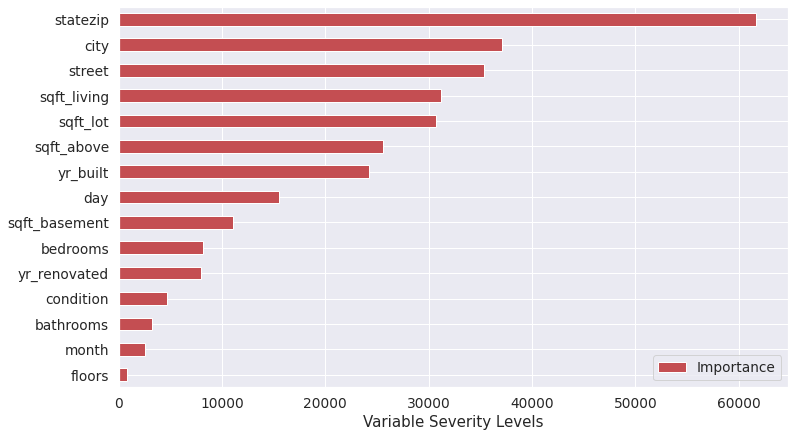

In [69]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Severity Levels")

If you like it plase vote!